# 线性回归

此Notebook配合Andrew Ng "Machine Learning"中线性回归部分学习使用.
- 作者: 麦旋风超好吃
- 测试用Python版本: 3.12
- 机器学习路径: [https://ml.ricolxwz.de/%E7%AE%97%E6%B3%95/%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%E6%A8%A1%E5%9E%8B/](https://ml.ricolxwz.de/%E7%AE%97%E6%B3%95/%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%E6%A8%A1%E5%9E%8B/)
- 参考资料: [https://share.ricolxwz.io/machine-learning/notebook/andrew-ng/ex1_linear_regression.ipynb](https://share.ricolxwz.io/machine-learning/notebook/andrew-ng/ex1_linear_regression.ipynb)
- 联络方式: ricol.xwz@outlook.com

## 前期准备

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('https://rshare.ricolxwz.io/machine-learning/dataset/andrew-ng/linear-regression/ex1data1.txt', names=['population', 'profit'])

In [9]:
df

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [11]:
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


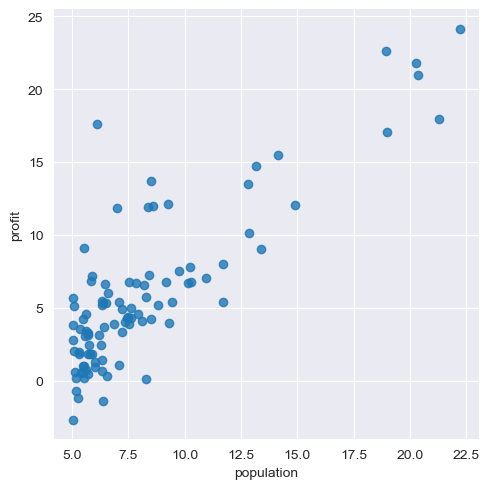

In [12]:
sns.lmplot(x='population', y='profit', data=df, fit_reg=False)

## 预估模型

预估模型为单变量线性回归, 将模型表示为: $h_{\theta}(x)=\theta_0+\theta_1x_1$.

为了能够简化公式, 引入$x_0=1$, 将公式转化为$h_{\theta}(x)=\theta_0x_0+\theta_1x_1$, 这个时候一共有$2$个特征, $2$个参数. 用矩阵$X$表示特征, 用矩阵$\theta$表示参数, 则有$h_{\theta}(x)=\theta^TX$, 其中上标$T$代表转置矩阵.

根据上面的思路, 可以写一个读取特征/标签的函数, 附带一个实现特征缩放的函数.

In [ ]:
def get_features(df): # 读取特征